In [1]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal

In [2]:
def buy():
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT
    # buy A sell B:
    sell_amount_B = B_FUND_AMOUNT - (B_FUND_AMOUNT % B_LIMIT)

    cost = (sell_amount_B * fee_real) / PRICE

    B_FUND_AMOUNT -= sell_amount_B
    A_FUND_AMOUNT += (sell_amount_B / PRICE - cost)

In [3]:
def sell():
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT
    # buy B sell A:
    sell_amount_A = A_FUND_AMOUNT - (A_FUND_AMOUNT % A_LIMIT)

    cost = sell_amount_A * fee_real * PRICE

    A_FUND_AMOUNT -= sell_amount_A
    B_FUND_AMOUNT += (sell_amount_A * PRICE - cost)

# Testing Strategy with real data (10 days) with threshold 1%
### 2019-09-07 21:14:00 ->   2019-09-17 23:09:00

In [4]:
test_file = '/home/nam/data/ccxt/100_days_1m.csv'

In [6]:
import pandas as pd
columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df = pd.read_csv(test_file)[columns]
df

,Open,High,Low,Close,Volume
0,0.004029,0.004029,0.004025,0.004025,830.20
1,0.004024,0.004029,0.004024,0.004024,2200.70
2,0.004024,0.004028,0.004016,0.004025,1420.25
3,0.004025,0.004028,0.004019,0.004023,1731.05
4,0.004025,0.004026,0.004022,0.004024,447.57
5,0.004024,0.004027,0.004022,0.004024,609.31
6,0.004022,0.004022,0.004018,0.004020,486.99
7,0.004020,0.004022,0.004017,0.004018,829.24
8,0.004018,0.004019,0.004013,0.004019,1474.91
9,0.004019,0.004021,0.004014,0.004014,1283.36


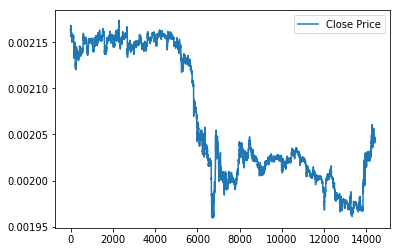

In [14]:
plt.plot(Close_lst, label='Close Price')
plt.legend()
plt.show()

In [15]:
fee_assume = Decimal('0.01')
A_FUND_AMOUNT_LIST = []
B_FUND_AMOUNT_LIST = []
PRICE_LIST = []
PRICE = Decimal(str(Close_lst[0]))
for NEW_PRICE in Close_lst[1:]:
    NEW_PRICE = Decimal(str(NEW_PRICE))
    if NEW_PRICE > PRICE / (Decimal('1.0') - fee_assume):
        PRICE = NEW_PRICE
        PRICE_LIST.append(PRICE)
        sell()
        A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
        B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)
    elif NEW_PRICE < PRICE * (Decimal('1.0') - fee_assume):
        PRICE = NEW_PRICE
        PRICE_LIST.append(PRICE)
        buy()
        A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
        B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)

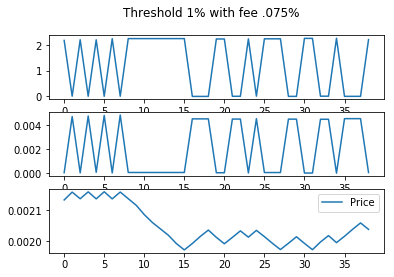

In [16]:
fig, axs = plt.subplots(3)
fig.suptitle('Threshold 1% with fee .075%')
axs[0].plot( A_FUND_AMOUNT_LIST, label='A Amount')
axs[1].plot( B_FUND_AMOUNT_LIST, label='B Amount')
axs[2].plot( PRICE_LIST, label='Price')

plt.legend()
plt.show()

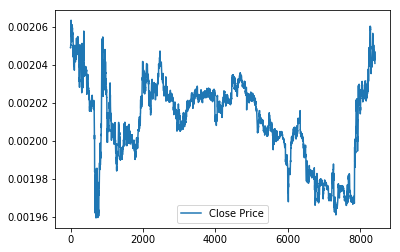

In [17]:
IDX_SPLIT = 6000
Close_lst = Close_lst[IDX_SPLIT:]
plt.plot(Close_lst, label='Close Price')
plt.legend()
plt.show()

In [18]:
fee_assume = Decimal('0.01')
A_FUND_AMOUNT_LIST = []
B_FUND_AMOUNT_LIST = []
PRICE_LIST = []
PRICE = Decimal(str(Close_lst[0]))
for NEW_PRICE in Close_lst[1:]:
    NEW_PRICE = Decimal(str(NEW_PRICE))
    if NEW_PRICE > PRICE / (Decimal('1.0') - fee_assume):
        PRICE = NEW_PRICE
        PRICE_LIST.append(PRICE)
        sell()
        A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
        B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)
    
    # TODO check condition when buy fee is still : BNB
    elif NEW_PRICE < PRICE * (Decimal('1.0') - fee_assume):
        PRICE = NEW_PRICE
        PRICE_LIST.append(PRICE)
        buy()
        A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
        B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)

No handles with labels found to put in legend.


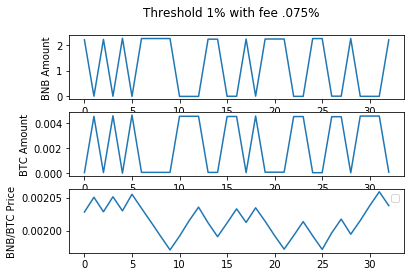

In [19]:
fig, axs = plt.subplots(3)
fig.suptitle('Threshold 1% with fee .075%')
# axs[0].plot( A_FUND_AMOUNT_LIST, label='A Amount')
axs[0].plot( A_FUND_AMOUNT_LIST)
axs[0].set_ylabel('BNB Amount')
axs[1].plot( B_FUND_AMOUNT_LIST)
axs[1].set_ylabel('BTC Amount')
axs[2].plot( PRICE_LIST)
axs[2].set_ylabel('BNB/BTC Price')

plt.legend()
plt.show()

# Modify threshold and compare

In [20]:
def modify_threshold(threshold = .01):
    global fee_assume, A_FUND_AMOUNT, B_FUND_AMOUNT, Close_lst
    global A_FUND_AMOUNT_LIST, B_FUND_AMOUNT_LIST
    fee_assume = Decimal(str(threshold))
    A_FUND_AMOUNT_LIST = []
    B_FUND_AMOUNT_LIST = []
    PRICE_LIST = []
    PRICE = Decimal(str(Close_lst[0]))
    PREV_SIDE = "buy" 
    for NEW_PRICE in Close_lst[1:]:
        NEW_PRICE = Decimal(str(NEW_PRICE))
        if NEW_PRICE > PRICE / (Decimal('1.0') - fee_assume) and PREV_SIDE == "buy":
            PRICE = NEW_PRICE
            PRICE_LIST.append(PRICE)
            sell()
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)
            PREV_SIDE = "sell"
        elif NEW_PRICE < PRICE * (Decimal('1.0') - fee_assume) and PREV_SIDE == "sell":
            PRICE = NEW_PRICE
            PRICE_LIST.append(PRICE)
            buy()
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)
            PREV_SIDE = "buy"

In [37]:
A_FUND_AMOUNT = Decimal('1.0')
# BTC fund amount
B_FUND_AMOUNT = Decimal('0.0')

modify_threshold(threshold=.001)

In [38]:
A_FUND_AMOUNT_LIST

[Decimal('0.00'),
 Decimal('0.9806182531894013738959764475'),
 Decimal('0.0006182531894013738959764475'),
 Decimal('0.9812365063788027477919528950'),
 Decimal('0.0012365063788027477919528950'),
 Decimal('0.9818547595682041216879293425'),
 Decimal('0.0018547595682041216879293425'),
 Decimal('0.9824730127576054955839057900'),
 Decimal('0.0024730127576054955839057900'),
 Decimal('0.9830912659470068694798822375'),
 Decimal('0.0030912659470068694798822375'),
 Decimal('0.9837095191364082433758586850'),
 Decimal('0.0037095191364082433758586850'),
 Decimal('0.9843277723258096172718351325'),
 Decimal('0.0043277723258096172718351325'),
 Decimal('0.9849460255152109911678115800'),
 Decimal('0.0049460255152109911678115800'),
 Decimal('0.9855642787046123650637880275'),
 Decimal('0.0055642787046123650637880275'),
 Decimal('0.9371516192345436702649656526'),
 Decimal('0.0071516192345436702649656526'),
 Decimal('0.9387389597644749754661432777'),
 Decimal('0.0087389597644749754661432777'),
 Decimal('0.94

In [39]:
B_FUND_AMOUNT_LIST

[Decimal('0.0020364715000'),
 Decimal('0.0000364715000'),
 Decimal('0.002032213570000000000000000000'),
 Decimal('0.000032213570000000000000000000'),
 Decimal('0.002027955640000000000000000000'),
 Decimal('0.000027955640000000000000000000'),
 Decimal('0.002023697710000000000000000000'),
 Decimal('0.000023697710000000000000000000'),
 Decimal('0.002019439780000000000000000000'),
 Decimal('0.000019439780000000000000000000'),
 Decimal('0.002015181850000000000000000000'),
 Decimal('0.000015181850000000000000000000'),
 Decimal('0.002010923920000000000000000000'),
 Decimal('0.000010923920000000000000000000'),
 Decimal('0.002006665990000000000000000000'),
 Decimal('0.000006665990000000000000000000'),
 Decimal('0.002002408060000000000000000000'),
 Decimal('0.000002408060000000000000000000'),
 Decimal('0.001998150130000000000000000000'),
 Decimal('0.000098150130000000000000000000'),
 Decimal('0.001992068625000000000000000000'),
 Decimal('0.000092068625000000000000000000'),
 Decimal('0.0019859871

In [22]:
A_FUND_AMOUNT = Decimal('1.0')
# BTC fund amount
B_FUND_AMOUNT = Decimal('0.0')

modify_threshold(threshold=.1)
print(A_FUND_AMOUNT_LIST)
print(B_FUND_AMOUNT_LIST)

[]
[]


In [44]:
df = pd.read_csv(test_file)
Close_lst = df.Close.values
A_FUND_AMOUNT = Decimal('1.0')
# BTC fund amount
B_FUND_AMOUNT = Decimal('0.0')

modify_threshold(threshold=.002)
print(A_FUND_AMOUNT_LIST[-2:])
print(B_FUND_AMOUNT_LIST[-2:])

[Decimal('0.0003263002944062806673209028'), Decimal('0.9809445534838076545632973503')]
[Decimal('0.002000270330000000000000000000'), Decimal('2.70330000000000000000000E-7')]
